In [16]:
%matplotlib inline    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Cleaning

In [17]:
# load all data
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True)

In [18]:
dataset.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [4]:
dataset['timestamp']=dataset['Date'].astype(str) + ' ' +dataset['Time']
dataset.drop(['Date', 'Time'], axis=1, inplace=True)
dataset.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,timestamp
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [19]:
print("shape of dataframe", dataset.shape)
 
# obtaining the number of rows
print("number of rows : ", dataset.shape[0])
 
# obtaining the number of columns
print("number of columns : ", dataset.shape[1])

shape of dataframe (2075259, 9)
number of rows :  2075259
number of columns :  9


In [5]:
dataset.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
timestamp                    0
dtype: int64

In [6]:
dataset = dataset[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2","Sub_metering_3"]]

In [7]:
from numpy import nan
# mark all missing values
dataset.replace('?', nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')

In [8]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]

In [9]:
# Loading the dataset
#df=pd.read_csv('power_cosump.csv')

In [10]:
from numpy import isnan
# fill missing
fill_missing(dataset.values)

In [11]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [12]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
# add a column for for the remainder of sub metering
values = dataset.values
dataset['active_energy'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [14]:
dataset. columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'active_energy'],
      dtype='object')

In [15]:
print("shape of dataframe", dataset.shape)
 
# obtaining the number of rows
print("number of rows : ", dataset.shape[0])
 
# obtaining the number of columns
print("number of columns : ", dataset.shape[1])

shape of dataframe (2075259, 8)
number of rows :  2075259
number of columns :  8


In [238]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy
0,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,52.266670
1,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,72.333336
2,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,70.566666
3,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,71.800003
4,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,43.099998


In [239]:
#dataset.to_csv('Clean_Energy_Dataset1.csv')

In [240]:
corr = dataset.corr()

<AxesSubplot:>

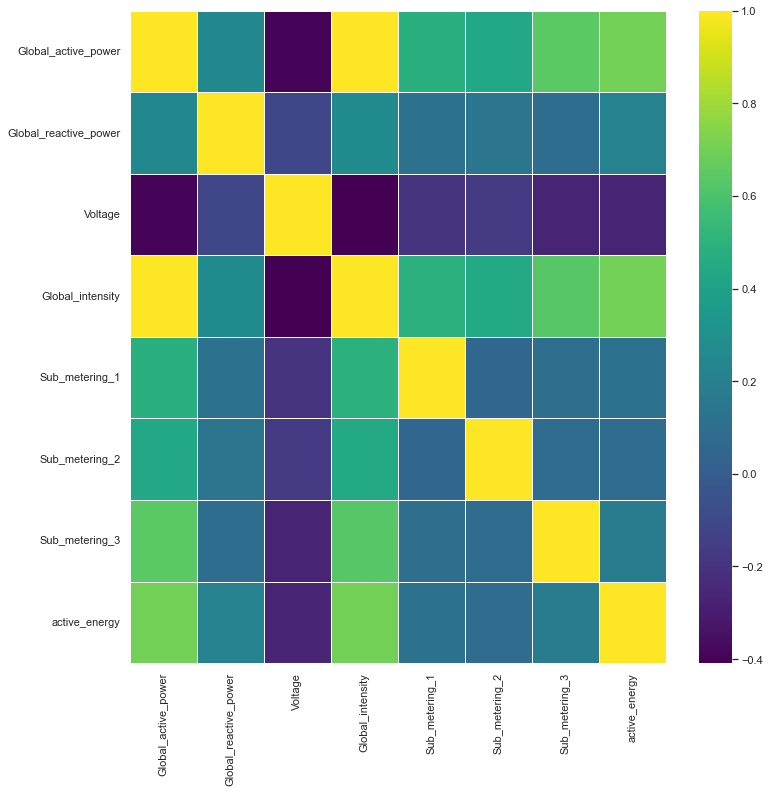

In [241]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, linewidths=.5, cmap='viridis')

In [19]:
# As we've noticed it is difficult to visualize high dimensional data,
# we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. 
# Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

## Standardization of the data

In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
scaler = StandardScaler()

In [245]:
#The Class code column is the value that needs to be predicted from the analysis. 
#Hence we will have to split X and y(Features and labels) based on this information
X = dataset.iloc[:,0:7]  # all rows, all the features and no labels
y = dataset.iloc[:,-1]  # all rows, label only

In [246]:
#scaled_data = scaler.fit_transform(X)
x_std = scaler.fit_transform(X)

In [247]:
print(x_std)

[[ 2.9644902   2.6139472  -1.8507216  ... -0.1821187  -0.05022164
   1.2511132 ]
 [ 4.0491815   2.7738144  -2.22417    ... -0.1821187  -0.05022164
   1.1325396 ]
 [ 4.0624557   3.324469   -2.3291101  ... -0.1821187   0.12228373
   1.2511132 ]
 ...
 [-0.14356771 -1.0985305  -0.31370506 ... -0.1821187  -0.22272702
  -0.76463777]
 [-0.14736035 -1.0985305  -0.35074472 ... -0.1821187  -0.22272702
  -0.76463777]
 [-0.14925669 -1.0985305  -0.39703843 ... -0.1821187  -0.22272702
  -0.76463777]]


In [248]:
x_std_df = pd.DataFrame(x_std,columns = X.columns)
x_std_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.964490,2.613947,-1.850722,3.108750,-0.182119,-0.050222,1.251113
1,4.049181,2.773814,-2.224170,4.146384,-0.182119,-0.050222,1.132540
2,4.062456,3.324469,-2.329110,4.146384,-0.182119,0.122284,1.251113
3,4.075730,3.359995,-2.190220,4.146384,-0.182119,-0.050222,1.251113
4,2.443004,3.590915,-1.591467,2.522262,-0.182119,-0.050222,1.251113


In [249]:
x_std_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2.129346e-08,-1.864649e-08,6.315248e-08,7.102723e-09,2.995496e-08,-1.932294e-08,-3.036671e-08
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.608788e-01,-1.098531e+00,-5.443259e+00,-9.966701e-01,-1.821187e-01,-2.227270e-01,-7.646378e-01
25%,-7.409065e-01,-6.722173e-01,-5.698745e-01,-7.259830e-01,-1.821187e-01,-2.227270e-01,-7.646378e-01
50%,-4.621484e-01,-2.103780e-01,5.048457e-02,-4.552960e-01,-1.821187e-01,-2.227270e-01,-6.460642e-01
75%,4.139484e-01,6.244854e-01,6.276346e-01,4.018798e-01,-1.821187e-01,-5.022164e-02,1.251113e+00
max,9.512461e+00,1.124679e+01,4.109062e+00,9.875928e+00,1.414673e+01,1.357770e+01,2.911143e+00


In [250]:
corr = x_std_df.corr()

<AxesSubplot:>

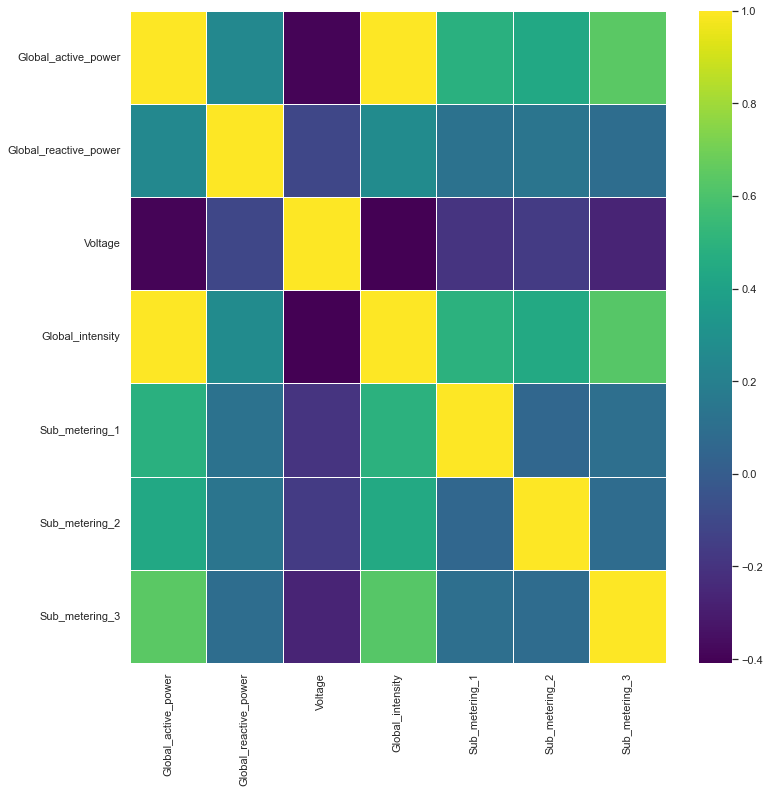

In [251]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, linewidths=.5, cmap='viridis')

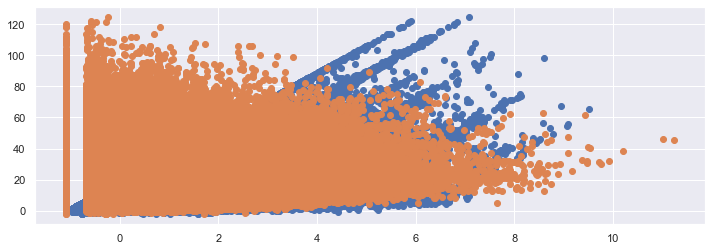

In [188]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x_std[:,0], y)
ax.scatter(x_std[:,1], y)

In [132]:
from sklearn.linear_model import Lasso
# define model
model = Lasso(alpha=1.0)

In [133]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
#dataframe = read_csv(url, header=None)
data = dataset.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.756 (0.002)


In [134]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
#dataframe = read_csv(url, header=None)
data = dataset.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.119 (0.009)


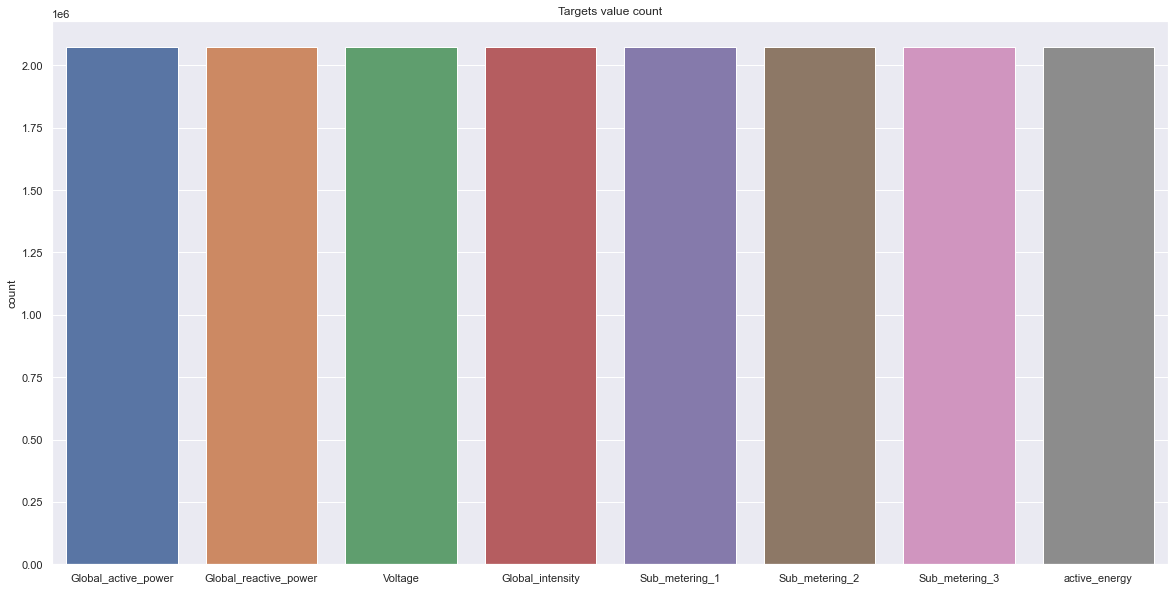

In [177]:
# Set general font size
plt.rcParams['font.size'] = '16'
sns.set(rc={'figure.figsize':(20,10)})
import matplotlib.pyplot as plt
import seaborn as sns 
 
sns.countplot(
    data=dataset)
plt.title('Targets value count')
plt.show()

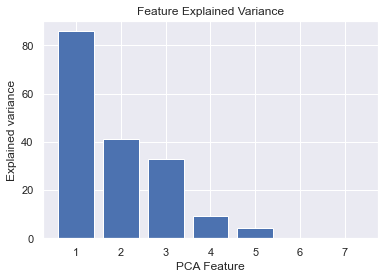

In [139]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 7 to 5 features with PCA
pca = PCA()
 
# Fit and transform data
pca.fit_transform(X)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

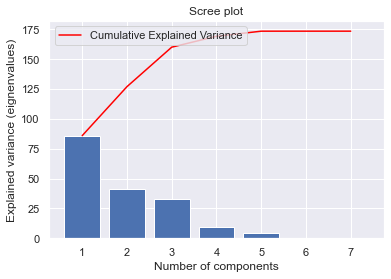

In [140]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA()
 
# Fit and transform data
reduced_features = pca.fit_transform(X)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

## Plotting Each Component vs. Original Data

In [144]:
def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new

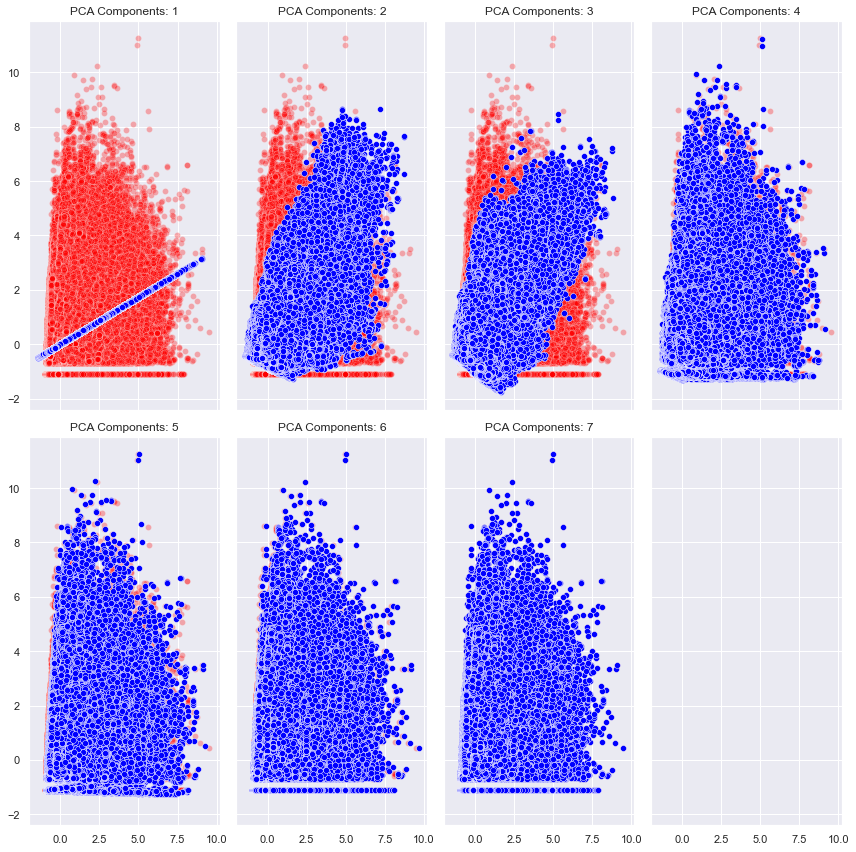

In [148]:
rows = 2
cols = 4
comps = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0], 
                                 y=X_scaled[:, 1], 
                                 ax=axes[row, col], 
                                 color='red', 
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0], 
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='blue')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.savefig('pcavisualize_2.png', dpi=300)

## Principal Component Analysis of the dataset

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA()

In [28]:
pca.fit_transform(X)

array([[17.215286  , -0.418541  ,  1.2668735 , ...,  8.455583  ,
         0.24371165,  0.32124862],
       [15.377344  ,  1.6878744 ,  1.8470788 , ..., 12.9091835 ,
         0.16020499,  0.08537228],
       [17.97524   ,  0.5910399 ,  1.9730906 , ..., 11.959935  ,
         0.22257444,  0.04596819],
       ...,
       [-6.2023387 ,  1.2218481 , -0.09752353, ...,  1.2686257 ,
        -0.13954118, -0.03405298],
       [-6.1866965 ,  1.2326583 , -0.09480109, ...,  1.2385656 ,
        -0.13889858, -0.03074519],
       [-6.1668158 ,  1.2461373 , -0.09143969, ...,  1.2016402 ,
        -0.13866617, -0.02947275]], dtype=float32)

In [217]:
pca.fit_transform(x_std_df)

array([[ 5.0097327 ,  0.70092887,  0.18270557, ...,  0.6363781 ,
         1.5759033 ,  0.24265844],
       [ 5.942507  ,  0.83536094,  0.18672216, ...,  0.76589286,
         2.7051125 ,  0.06832068],
       [ 6.2109976 ,  1.0813414 ,  0.23204409, ...,  0.75932944,
         2.4305167 ,  0.04110339],
       ...,
       [-0.6877948 , -0.55355334, -0.17969589, ...,  0.5168759 ,
         0.52011794, -0.02537491],
       [-0.6789234 , -0.55875564, -0.18155551, ...,  0.5523112 ,
         0.5164221 , -0.02306466],
       [-0.66631263, -0.56542474, -0.18396498, ...,  0.5961474 ,
         0.5130253 , -0.02218389]], dtype=float32)

In [218]:
pca.get_covariance()

array([[ 0.99982405,  0.24708685, -0.39685331,  0.99887897,  0.48412872,
         0.4340148 ,  0.63895277],
       [ 0.24708685,  0.99825622, -0.11081895,  0.26626059,  0.12303106,
         0.13933995,  0.08997188],
       [-0.39685331, -0.11081895,  0.99842778, -0.40854804, -0.19505857,
        -0.16573415, -0.26597316],
       [ 0.99887897,  0.26626059, -0.40854804,  1.00016214,  0.48912745,
         0.43985728,  0.62704559],
       [ 0.48412872,  0.12303106, -0.19505857,  0.48912745,  0.99587984,
         0.05455378,  0.10198496],
       [ 0.4340148 ,  0.13933995, -0.16573415,  0.43985728,  0.05455378,
         0.99657499,  0.08163452],
       [ 0.63895277,  0.08997188, -0.26597316,  0.62704559,  0.10198496,
         0.08163452,  0.99950977]])

In [30]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.95431109e-01, 2.36555666e-01, 1.90715867e-01, 5.25994147e-02,
       2.46200046e-02, 6.92577501e-05, 8.68055754e-06])

In [219]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.61650260e-01, 1.40952634e-01, 1.33017862e-01, 1.21172984e-01,
       1.12151117e-01, 3.09496196e-02, 1.05524027e-04])

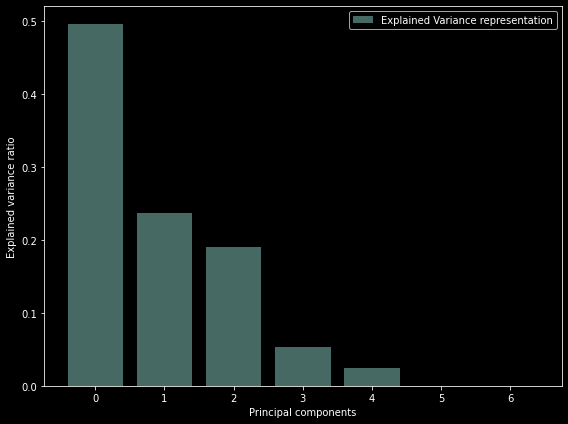

In [31]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='Explained Variance representation')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

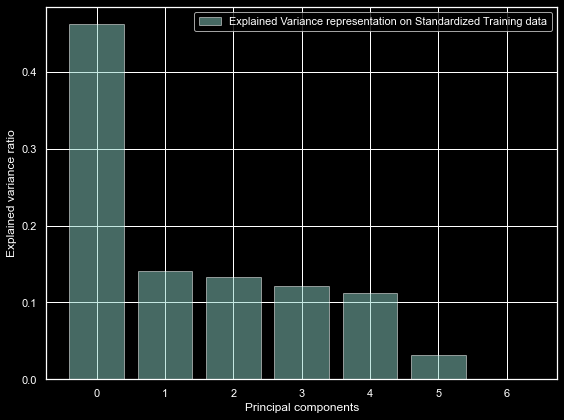

In [222]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='Explained Variance representation on Standardized Training data')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [32]:
from sklearn.linear_model import Lasso
# define model
model = Lasso(alpha=1.0)

In [67]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
#dataframe = read_csv(url, header=None)
data = dataset.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.665 (0.001)


In [68]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
#dataframe = read_csv(url, header=None)
data = dataset.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.017 (0.003)


In [112]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'active_energy'],
      dtype='object')

In [113]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy
0,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,52.266670
1,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,72.333336
2,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,70.566666
3,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,71.800003
4,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,43.099998


In [163]:
X=dataset[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
1,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
3,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
4,3.666,0.528,235.679993,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.429993,4.0,0.0,0.0,0.0
2075255,0.944,0.000,240.000000,4.0,0.0,0.0,0.0
2075256,0.938,0.000,239.820007,3.8,0.0,0.0,0.0
2075257,0.934,0.000,239.699997,3.8,0.0,0.0,0.0


In [164]:
y=dataset[['active_energy']]
y

,active_energy
0,52.266670
1,72.333336
2,70.566666
3,71.800003
4,43.099998
...,...
2075254,15.766666
2075255,15.733334
2075256,15.633333
2075257,15.566667


In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=85)

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions=lm.predict(X_test)

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean
from numpy import std
model = Ridge(alpha=1.0)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.002 (0.001)


In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, predictions)

plt.plot(y_test, predictions, 'o', label='data')
plt.plot(y_test, intercept + slope*y_test, 'r', label='fitted line')
plt.legend()
plt.annotate(
'y = ' + str(round(slope,2)) + 'x' + ' + ' + str(round(intercept,2)), xy=(3, 1.5), xytext=(3.2, 1.25),
arrowprops=dict(facecolor='black', shrink=0.01))
plt.xlabel('Actual Values')
plt.title('Actual vs Predicted Values')
plt.ylabel('Predicted Values')
plt.show()
print("r-squared: %f" % r_value**2)

In [39]:
# Print the sets data shapes
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
#print("X_val shape: {}".format(X_val.shape))
#print("y_val shape: {}".format(y_val.shape))

X_train shape: (1383506, 7)
X_test shape: (691753, 7)
y_train shape: (1383506, 1)
y_test shape: (691753, 1)


In [40]:
X_train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1648205,2.548,0.196,240.660004,10.6,1.0,0.0,18.0
1624609,2.032,0.130,241.889999,8.4,0.0,0.0,18.0
1016419,0.296,0.062,241.190002,1.4,0.0,0.0,0.0
1507463,1.362,0.074,240.300003,5.6,0.0,0.0,18.0
1382785,0.140,0.000,243.059998,0.6,0.0,0.0,1.0
...,...,...,...,...,...,...,...
1689139,0.276,0.000,242.289993,1.2,0.0,0.0,0.0
2045636,3.578,0.132,236.059998,15.2,0.0,1.0,17.0
704397,1.866,0.112,239.720001,7.8,0.0,0.0,19.0
554144,2.224,0.424,235.130005,9.6,0.0,1.0,17.0


In [41]:
X_test

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
657033,1.376,0.066,239.169998,5.6,0.0,0.0,18.0
736266,1.884,0.212,243.190002,7.8,0.0,2.0,1.0
430919,1.846,0.078,240.690002,7.6,0.0,2.0,0.0
1554586,4.440,0.128,238.639999,18.6,0.0,0.0,25.0
1197565,1.412,0.000,241.050003,5.8,1.0,0.0,18.0
...,...,...,...,...,...,...,...
1717463,1.714,0.242,243.110001,7.0,0.0,2.0,19.0
298194,1.288,0.106,240.350006,5.4,0.0,0.0,17.0
739594,2.478,0.462,242.990005,10.2,0.0,1.0,30.0
1898397,1.340,0.048,238.419998,5.6,0.0,0.0,0.0


In [42]:
y_test

,active_energy
657033,4.933332
736266,28.400000
430919,28.766666
1554586,49.000000
1197565,4.533333
...,...
1717463,7.566668
298194,4.466667
739594,10.299999
1898397,22.333334


In [43]:
y_train

,active_energy
1648205,23.466667
1624609,15.866669
1016419,4.933333
1507463,4.700001
1382785,1.333333
...,...
1689139,4.600000
2045636,41.633335
704397,12.100000
554144,19.066666


In [46]:
model = LinearRegression().fit(X_train, y_train)
model.intercept_

array([-0.04647255], dtype=float32)

In [47]:
model.coef_

array([[ 1.6654781e+01, -9.8931789e-03,  1.3660587e-04,  9.2634577e-03,
        -1.0031697e+00, -1.0022712e+00, -1.0013273e+00]], dtype=float32)

In [48]:
model.score(X_train, y_train)

0.9999966369195286

In [50]:
model.score(X_test, y_test)

0.9999966394963599

In [ ]:
# Method 1. Splitting the data randomly

In [55]:
# Using Sklearn --> train_test_split
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_dsplit(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1660207, 7)
(1660207, 1)
(207526, 7)
(207526, 1)
(207526, 7)
(207526, 1)


(None, None)

In [62]:
# Using Fast_ml --> train_valid_test_split
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(dataset, target = 'active_energy', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1660207, 7)
(1660207,)
(207526, 7)
(207526,)
(207526, 7)
(207526,)


(None, None)

In [63]:
model = LinearRegression().fit(X_train, y_train)
model.intercept_

-0.09101772

In [64]:
model.coef_

array([ 1.6643133e+01, -1.6704440e-02,  2.6222793e-04,  1.6613677e-02,
       -1.0048281e+00, -1.0031540e+00, -1.0018108e+00], dtype=float32)

In [65]:
model.score(X_train, y_train)

0.9999905647291482

In [66]:
model.score(X_test, y_test)

0.9999905571906313

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
model1 = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
model1.score(X_train, y_train)

0.9806936186876477

In [70]:
model1.score(X_test, y_test)

0.9809092947064537

In [71]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089417e+00,1.236871e-01,2.408364e+02,4.618402e+00,1.118474e+00,1.291131e+00,6.448635e+00,9.298722e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00,9.561277e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


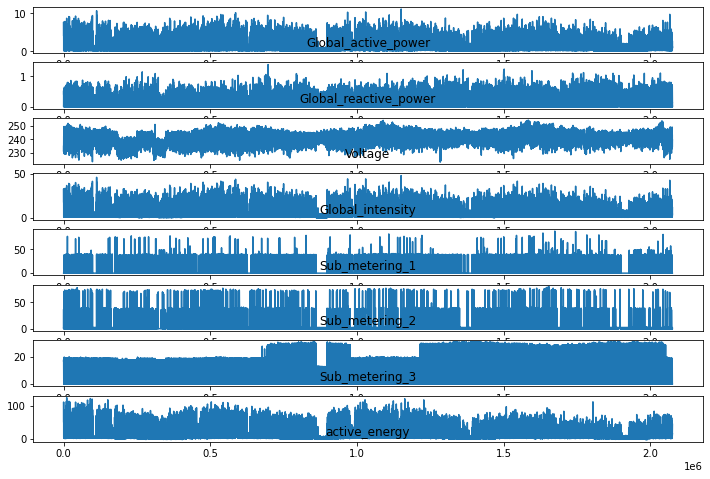

In [86]:
# line plots
from pandas import read_csv
from matplotlib import pyplot
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()

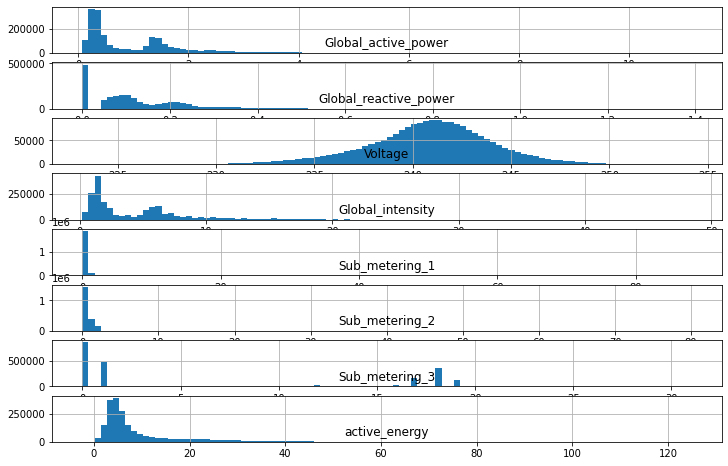

In [85]:
# histogram plots
from pandas import read_csv
from matplotlib import pyplot
# histogram plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	dataset[name].hist(bins=100)
	pyplot.title(name, y=0)
pyplot.show()

In [82]:
# increase the font size 
plt.rcParams['font.size'] = 10

In [84]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]